In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [ ]:
from google import colab
colab.drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/portfolio/after_cohort_data/user_data.csv', index_col = 0)

In [ ]:
weekday = [dt for dt in data['ACT_DATE'].drop_duplicates().tolist() if date(int(dt[0:4]), int(dt[5:7]), int(dt[8:10])).weekday() <5]

In [ ]:
weekday_data = data[data['ACT_DATE'].isin(weekday)].copy(deep=True)

In [ ]:
weekday_data

,INTEREST_FIELD,ACT_DATE
USER_SEQ,,
1,Portfolio,2021-11-15
2,Portfolio,2021-11-15
3,Portfolio,2021-11-15
4,Portfolio,2021-11-15
5,Portfolio,2021-11-15
...,...,...
208,Event,2021-11-19
209,Event,2021-11-19
210,Event,2021-11-19


In [ ]:
weekday_data['CohortGroup'] = weekday_data.groupby(level=0)['ACT_DATE'].min()
weekday_data.reset_index(inplace=True)
weekday_data.head()

,USER_SEQ,INTEREST_FIELD,ACT_DATE,CohortGroup
0,1,Portfolio,2021-11-15,2021-11-15
1,2,Portfolio,2021-11-15,2021-11-15
2,3,Portfolio,2021-11-15,2021-11-15
3,4,Portfolio,2021-11-15,2021-11-15
4,5,Portfolio,2021-11-15,2021-11-15


In [ ]:
grouped = weekday_data.groupby(['INTEREST_FIELD', 'ACT_DATE'])

In [ ]:
cohorts = grouped.agg({'USER_SEQ': pd.Series.nunique})

In [ ]:
def cohort_period(data):
  data['CohortPeriod'] = np.arange(len(data)) + 1
  return data

In [ ]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [ ]:
cohorts.rename(columns={'USER_SEQ': 'TotalUsers',
                        }, inplace=True)
cohorts.head()

TotalUsers  CohortPeriod
INTEREST_FIELD ACT_DATE                            
Community      2021-11-15         100             1
               2021-11-16          35             2
               2021-11-17          25             3
               2021-11-18          20             4
               2021-11-19          18             5

In [ ]:
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

INTEREST_FIELD
Community    100
Event        100
Portfolio    100
Name: TotalUsers, dtype: int64

In [ ]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

INTEREST_FIELD,Community,Event,Portfolio
ACT_DATE,,,
2021-11-15,1.00,1.00,1.00
2021-11-16,0.35,0.25,0.45
2021-11-17,0.25,0.20,0.35
2021-11-18,0.20,0.16,0.25
2021-11-19,0.18,0.12,0.23


In [ ]:
user_retention

INTEREST_FIELD,Community,Event,Portfolio
ACT_DATE,,,
2021-11-15,1.00,1.00,1.00
2021-11-16,0.35,0.25,0.45
2021-11-17,0.25,0.20,0.35
2021-11-18,0.20,0.16,0.25
2021-11-19,0.18,0.12,0.23


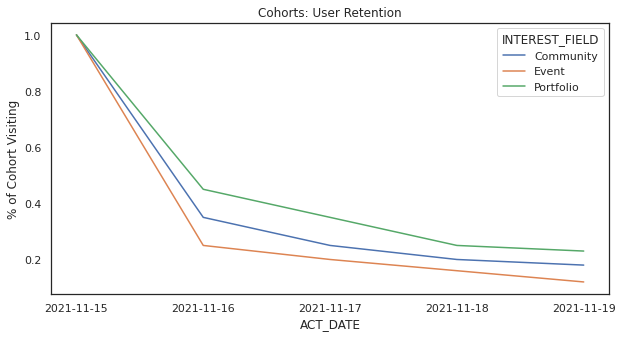

In [ ]:
user_retention[['Community', 'Event', 'Portfolio']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.ylabel('% of Cohort Visiting');

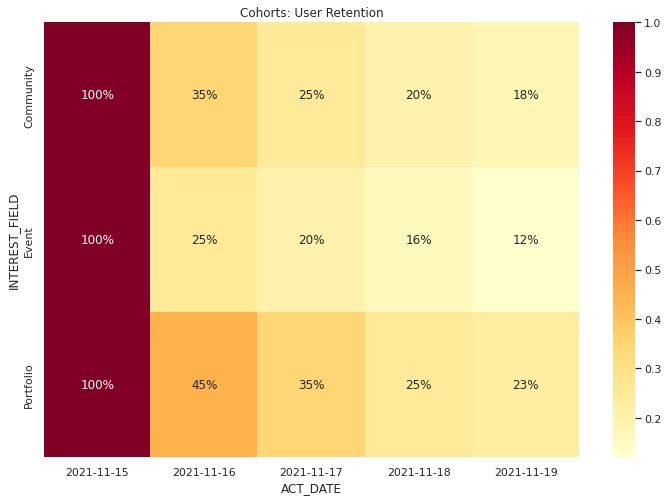

In [ ]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, cmap="YlOrRd", fmt='.0%');